In [1]:
import pandas as pd
import numpy as np

## Import Data

In [2]:
df = pd.read_csv("london_crime_by_lsoa.csv")
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [4]:
df.shape

(13490604, 7)

In [5]:
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [6]:
mc = df["major_category"].value_counts()
mc

Theft and Handling             3966300
Violence Against the Person    3171744
Criminal Damage                2069172
Drugs                          1179468
Burglary                       1043604
Robbery                         939384
Other Notifiable Offences       776304
Fraud or Forgery                236520
Sexual Offences                 108108
Name: major_category, dtype: int64

In [7]:
df.set_index('major_category')

,lsoa_code,borough,minor_category,value,year,month
major_category,,,,,,
Burglary,E01001116,Croydon,Burglary in Other Buildings,0,2016,11
Violence Against the Person,E01001646,Greenwich,Other violence,0,2016,11
Violence Against the Person,E01000677,Bromley,Other violence,0,2015,5
Burglary,E01003774,Redbridge,Burglary in Other Buildings,0,2016,3
Robbery,E01004563,Wandsworth,Personal Property,0,2008,6
...,...,...,...,...,...,...
Criminal Damage,E01000504,Brent,Criminal Damage To Dwelling,0,2015,2
Robbery,E01002504,Hillingdon,Personal Property,1,2015,6
Burglary,E01004165,Sutton,Burglary in a Dwelling,0,2011,2


In [8]:
test = df.loc[:, ['major_category','year']]
test

,major_category,year
0,Burglary,2016
1,Violence Against the Person,2016
2,Violence Against the Person,2015
3,Burglary,2016
4,Robbery,2008
...,...,...
13490599,Criminal Damage,2015
13490600,Robbery,2015
13490601,Burglary,2011
13490602,Robbery,2011


In [9]:
condition = df['borough'] == 'Greenwich'
condition

0           False
1            True
2           False
3           False
4           False
            ...  
13490599    False
13490600    False
13490601    False
13490602    False
13490603    False
Name: borough, Length: 13490604, dtype: bool

In [10]:
df[condition]

,lsoa_code,borough,major_category,minor_category,value,year,month
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
75,E01001600,Greenwich,Burglary,Burglary in Other Buildings,0,2016,11
100,E01001572,Greenwich,Drugs,Possession Of Drugs,0,2012,10
221,E01001634,Greenwich,Criminal Damage,Criminal Damage To Motor Vehicle,0,2008,2
248,E01001635,Greenwich,Theft and Handling,Motor Vehicle Interference & Tampering,0,2009,2
...,...,...,...,...,...,...,...
13490518,E01001665,Greenwich,Drugs,Possession Of Drugs,0,2014,11
13490546,E01001632,Greenwich,Criminal Damage,Criminal Damage To Dwelling,0,2013,1
13490572,E01033735,Greenwich,Criminal Damage,Criminal Damage To Motor Vehicle,1,2013,8
13490590,E01001679,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4


## Data Visualization

In [11]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

## Line Plot

#### Question:  

visualize London Crime per Month

In [12]:
i = df.groupby(['month']).sum()
ie = i.drop(['year'], axis=1)
ie

,value
month,
1,530247
2,500537
3,551795
4,520648
5,552704
6,549041
7,563076
8,532784
9,522377


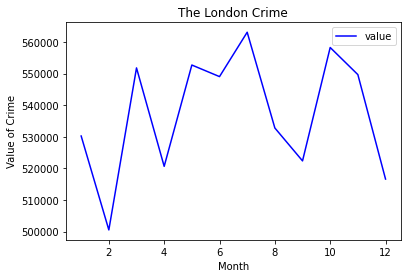

In [13]:
ie.plot(kind='line', color='blue')

plt.title('The London Crime')
plt.ylabel('Value of Crime')
plt.xlabel('Month')
plt.show()

Berdasarkan grafik line plot yang dihasilkan, diketahui bahwa jumlah tingkat kriminal di London paling tinggi berada pada bulan 7 dan tingkat krimnial paling rendah berada pada bulan 2

## Area Plot

#### Question:

visualize London Crime 

In [14]:
test

,major_category,year
0,Burglary,2016
1,Violence Against the Person,2016
2,Violence Against the Person,2015
3,Burglary,2016
4,Robbery,2008
...,...,...
13490599,Criminal Damage,2015
13490600,Robbery,2015
13490601,Burglary,2011
13490602,Robbery,2011


In [15]:
area = df.drop(['lsoa_code', 'month'], axis=1)
area

,borough,major_category,minor_category,value,year
0,Croydon,Burglary,Burglary in Other Buildings,0,2016
1,Greenwich,Violence Against the Person,Other violence,0,2016
2,Bromley,Violence Against the Person,Other violence,0,2015
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016
4,Wandsworth,Robbery,Personal Property,0,2008
...,...,...,...,...,...
13490599,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015
13490600,Hillingdon,Robbery,Personal Property,1,2015
13490601,Sutton,Burglary,Burglary in a Dwelling,0,2011
13490602,Croydon,Robbery,Business Property,0,2011


In [16]:
result = area.groupby(['major_category', 'year'], axis=0).sum()
result

value
major_category              year        
Burglary                    2008   88092
                            2009   90619
                            2010   86826
                            2011   93315
                            2012   93392
...                                  ...
Violence Against the Person 2012  150014
                            2013  146181
                            2014  185349
                            2015  218740
                            2016  232381

[81 rows x 1 columns]

In [17]:
s = result.unstack()
sa = s.transpose()
sa

major_category  Burglary  Criminal Damage  Drugs  Fraud or Forgery  \
      year                                                           
value 2008         88092            91872  68804              5325   
      2009         90619            85565  60549                 0   
      2010         86826            77897  58674                 0   
      2011         93315            70914  57550                 0   
      2012         93392            62158  51776                 0   
      2013         87222            56206  50278                 0   
      2014         76053            59279  44435                 0   
      2015         70489            62976  39785                 0   
      2016         68285            64071  38914                 0   

major_category  Other Notifiable Offences  Robbery  Sexual Offences  \
      year                                                            
value 2008                          10112    29627             1273   
      2009                          10644    29568                0   
      2010                          10768    32341                0   
      2011                          10264    36679                0   
      2012                          10675    35260                0   
      2013                          10811    29337                0   
      2014                          13037    22150                0   
      2015                          14229    21383                0   
      2016                          15809    22528                0   

major_category  Theft and Handling  Violence Against the Person  
      year                                                       
value 2008                  283692                       159844  
      2009                  279492                       160777  
      2010                  290924                       157894  
      2011                  309292                       146901  
      2012                  334054                       150014  
      2013                  306372                       146181  
      2014                  279880                       185349  
      2015                  284022                       218740  
      2016                  294133                       232381

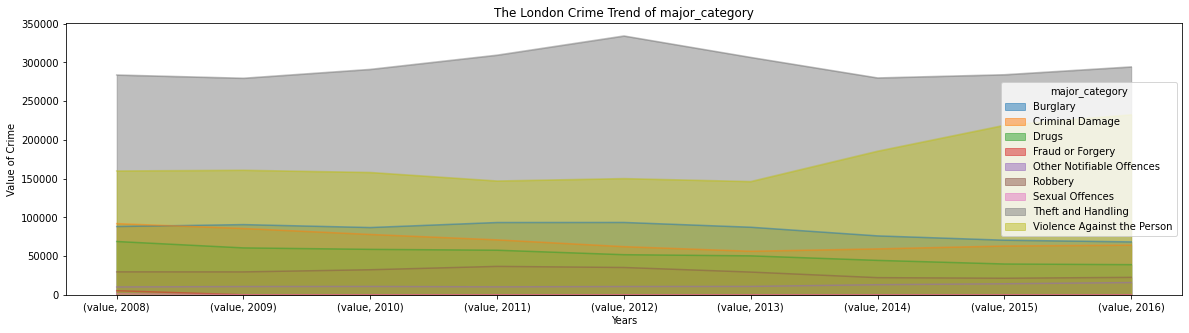

In [18]:
sa.plot(kind='area',
            stacked=False,
            figsize=(20, 5),
            )

plt.title('The London Crime Trend of major_category')
plt.ylabel('Value of Crime')
plt.xlabel('Years')

plt.show()

berdasarkan grafik area plot yang dihasilkan, diketahui tindakan kriminal Theft and Handling di London sangat tinggi kemudian ada tindakan kriminal Violence Against the Person dan Other Notifiable Offerences

## Histogram

#### Question:

how is the frequency distribution of drug crime rates during 2008 - 2016?

In [19]:
s

value                                          \
year                           2008    2009    2010    2011    2012    2013   
major_category                                                                
Burglary                      88092   90619   86826   93315   93392   87222   
Criminal Damage               91872   85565   77897   70914   62158   56206   
Drugs                         68804   60549   58674   57550   51776   50278   
Fraud or Forgery               5325       0       0       0       0       0   
Other Notifiable Offences     10112   10644   10768   10264   10675   10811   
Robbery                       29627   29568   32341   36679   35260   29337   
Sexual Offences                1273       0       0       0       0       0   
Theft and Handling           283692  279492  290924  309292  334054  306372   
Violence Against the Person  159844  160777  157894  146901  150014  146181   

                                                     
year                           2014    2015    2016  
major_category                                       
Burglary                      76053   70489   68285  
Criminal Damage               59279   62976   64071  
Drugs                         44435   39785   38914  
Fraud or Forgery                  0       0       0  
Other Notifiable Offences     13037   14229   15809  
Robbery                       22150   21383   22528  
Sexual Offences                   0       0       0  
Theft and Handling           279880  284022  294133  
Violence Against the Person  185349  218740  232381

In [20]:
his = s.loc[['Drugs']]
histo = his.transpose()
histo

major_category  Drugs
      year           
value 2008      68804
      2009      60549
      2010      58674
      2011      57550
      2012      51776
      2013      50278
      2014      44435
      2015      39785
      2016      38914

In [21]:
count, bin_edges = np.histogram(histo)

print(count)
print(bin_edges) 

[2 1 0 1 1 0 2 1 0 1]
[38914. 41903. 44892. 47881. 50870. 53859. 56848. 59837. 62826. 65815.
 68804.]


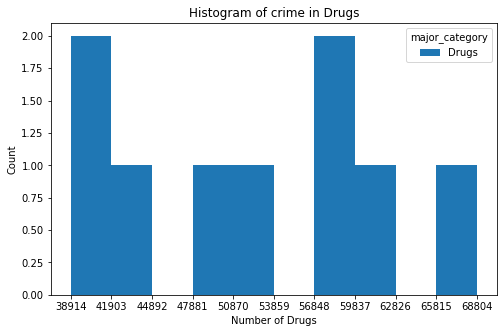

In [22]:
count, bin_edges = np.histogram(histo)

histo.plot(kind='hist',
            figsize=(8, 5),
            bins=10,
            xticks=bin_edges
            )

plt.title('Histogram of crime in Drugs')
plt.ylabel('Count')
plt.xlabel('Number of Drugs')

plt.show()

berdasarkan grafik histogram diatas, dapat diketahui bahwa sebaran datanya cenderung simetris sehingga nilai median, modus, dan rataannya bernilai sama.

## Bar Chart

#### Question:

compare the number crime in Drugs from year 2008 - 2016

In [23]:
histo

major_category  Drugs
      year           
value 2008      68804
      2009      60549
      2010      58674
      2011      57550
      2012      51776
      2013      50278
      2014      44435
      2015      39785
      2016      38914

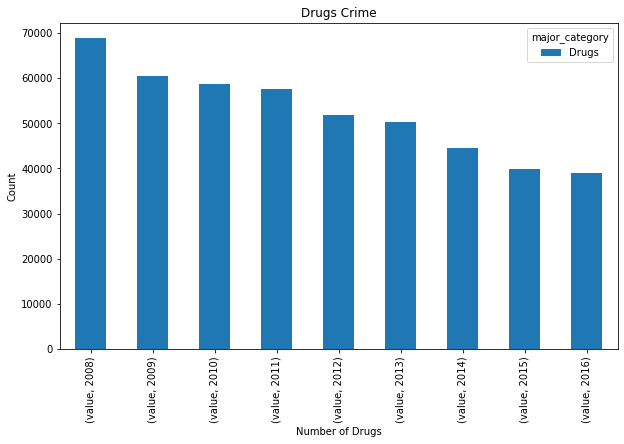

In [24]:
histo.plot(kind='bar',
            figsize=(10, 6)
            )

plt.title('Drugs Crime')
plt.ylabel('Count')
plt.xlabel('Number of Drugs')

plt.show()

berdasarkan grafik diatas, diketahui kriminal untuk kategori narkoba dari tahun 2008-2016 berada pada kisaran angka 40000-70000. Angka tertinggi dari kejahatan narkoba berapa pada tahun 2008 dan terendah pada tahun 2016

## Pie Chart

#### Question:

explore the percentage of major category in London

In [25]:
p = area.groupby([ 'major_category']).sum()
p

,value,year
major_category,,
Burglary,754293,2099731248
Criminal Damage,630938,4163174064
Drugs,470765,2373089616
Fraud or Forgery,5325,475878240
Other Notifiable Offences,106349,1561923648
Robbery,258873,1890040608
Sexual Offences,1273,217513296
Theft and Handling,2661861,7980195600
Violence Against the Person,1558081,6381548928


In [26]:
pi = p.drop(['year'], axis=1)
pi

,value
major_category,
Burglary,754293
Criminal Damage,630938
Drugs,470765
Fraud or Forgery,5325
Other Notifiable Offences,106349
Robbery,258873
Sexual Offences,1273
Theft and Handling,2661861
Violence Against the Person,1558081


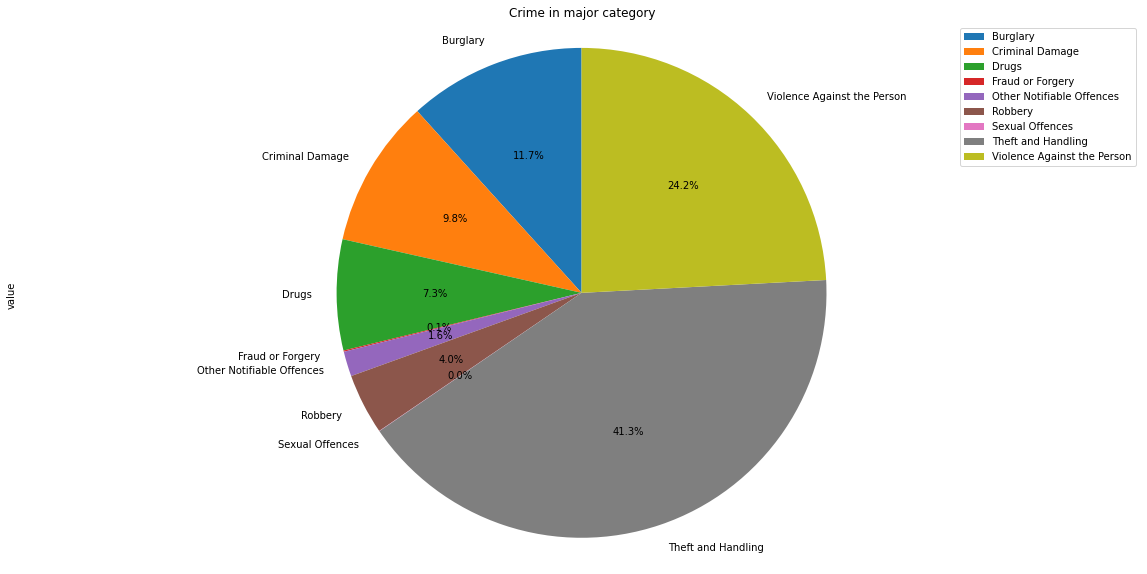

In [27]:
pi.plot(kind='pie',
        figsize=(20, 10),
        autopct='%1.1f%%',
        startangle=90,
        shadow=False,
        subplots=True
        )

plt.title('Crime in major category')
plt.axis('equal')
plt.show()

berdasarkan grafik pie chart diatas, diketahui bahwa major category terbesar adalah theft and handing sebesar 41.3%, violence against the person sebesar 24.2%, bulglary 11.7%, criminal damage 9.8%, drugs 7.3%, robbery 4%, other notifiable offences 1.6%, fraud or forgery 0.1%, dan sexual offences 0%.

## Box Plots

#### Question:

explore distribution of Drugs crime 

In [28]:
histo

major_category  Drugs
      year           
value 2008      68804
      2009      60549
      2010      58674
      2011      57550
      2012      51776
      2013      50278
      2014      44435
      2015      39785
      2016      38914

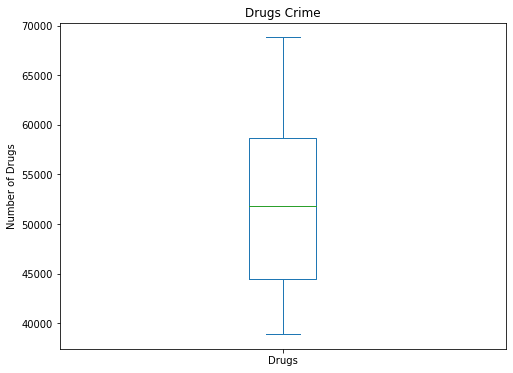

In [29]:
histo.plot(kind='box', figsize=(8, 6))

plt.title('Drugs Crime')
plt.ylabel('Number of Drugs')

plt.show()

berdasarkan grafik berdasarkan box plot diatas, kriminal narkoba memiliki nilai min berada disekitar 4000 maksimal disekitar 70000. nilai median berada diantara 50000 - 55000. 

## Scatter Plots

#### Question:

visualize trend London Crime 

In [30]:
ie

,value
month,
1,530247
2,500537
3,551795
4,520648
5,552704
6,549041
7,563076
8,532784
9,522377


In [31]:
ie.reset_index(inplace=True)

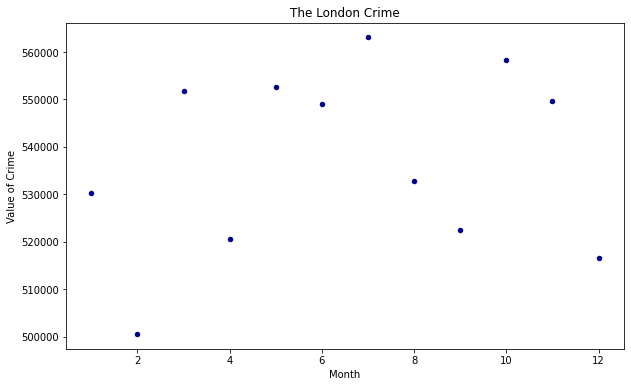

In [32]:
ie.plot(kind='scatter', x='month', y='value', figsize=(10,6), color='darkblue')

plt.title('The London Crime')
plt.ylabel('Value of Crime')
plt.xlabel('Month')

plt.show()

berdasarkan grafik scatterplot diatas, diketahui bahwa tingkat kejahatan di London naik di bulan 5-7 dan mengalami penurunan pada bulan 10-12

## Word Clouds

#### Question:

Create Wordcloud major_category from data Crime in London

In [33]:
from wordcloud import WordCloud, STOPWORDS

In [34]:
stopwords = set(STOPWORDS)

In [35]:
word = df['major_category']
word

0                              Burglary
1           Violence Against the Person
2           Violence Against the Person
3                              Burglary
4                               Robbery
                       ...             
13490599                Criminal Damage
13490600                        Robbery
13490601                       Burglary
13490602                        Robbery
13490603    Violence Against the Person
Name: major_category, Length: 13490604, dtype: object

In [36]:
major_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

major_wc.generate("".join(word))

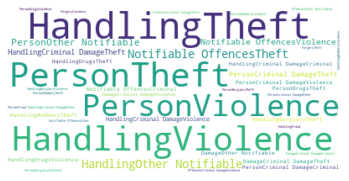

In [37]:
plt.imshow(major_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Wordcould diatas memberikan informasi bahwa major_categori dalam crime in london di dominasi oleh Handling Theft, Person Theft, Handling Violence, dan Person violence

## Folium Maps

In [38]:
import folium

In [39]:
area

,borough,major_category,minor_category,value,year
0,Croydon,Burglary,Burglary in Other Buildings,0,2016
1,Greenwich,Violence Against the Person,Other violence,0,2016
2,Bromley,Violence Against the Person,Other violence,0,2015
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016
4,Wandsworth,Robbery,Personal Property,0,2008
...,...,...,...,...,...
13490599,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015
13490600,Hillingdon,Robbery,Personal Property,1,2015
13490601,Sutton,Burglary,Burglary in a Dwelling,0,2011
13490602,Croydon,Robbery,Business Property,0,2011
